In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [3]:
dataset = pd.read_csv('bank.csv')
dataset

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep
0,1,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES
1,2,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO
2,3,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO
3,4,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO
4,5,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO
596,597,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO
597,598,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES
598,599,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO


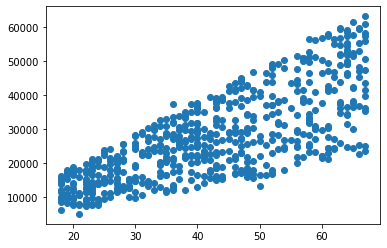

In [4]:
plt.scatter(dataset['age'], dataset['income'])

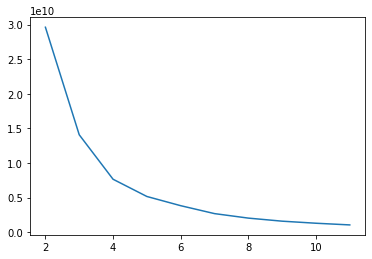

In [5]:
wcss = []
x = dataset.iloc[:, [1,4]].values
for i in range(2, 12):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=200, random_state=0)
    km.fit(x)
    wcss.append(km.inertia_)
plt.plot(range(2,12), wcss)
plt.show()

In [7]:
k = KMeans(n_clusters=5)
y_predict = k.fit_predict(dataset[['age', 'income']])
dataset['cluster'] = y_predict
dataset

,id,age,sex,region,income,married,children,car,save_act,current_act,mortgage,pep,cluster
0,1,48,FEMALE,INNER_CITY,17546.00,NO,1,NO,NO,NO,NO,YES,0
1,2,40,MALE,TOWN,30085.10,YES,3,YES,NO,YES,YES,NO,3
2,3,51,FEMALE,INNER_CITY,16575.40,YES,0,YES,YES,YES,NO,NO,2
3,4,23,FEMALE,TOWN,20375.40,YES,3,NO,NO,YES,NO,NO,0
4,5,57,FEMALE,RURAL,50576.30,YES,0,NO,YES,NO,NO,NO,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,61,FEMALE,INNER_CITY,47025.00,NO,2,YES,YES,YES,YES,NO,4
596,597,30,FEMALE,INNER_CITY,9672.25,YES,0,YES,YES,YES,NO,NO,2
597,598,31,FEMALE,TOWN,15976.30,YES,0,YES,YES,NO,NO,YES,2
598,599,29,MALE,INNER_CITY,14711.80,YES,0,NO,YES,NO,YES,NO,2


[[3.96234568e+01 2.18347864e+04]
 [5.30108696e+01 4.02533370e+04]
 [2.84387097e+01 1.32572176e+04]
 [4.54960630e+01 3.00625843e+04]
 [6.17968750e+01 5.31415531e+04]]


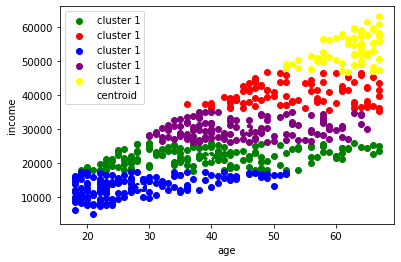

In [8]:
ds1 = dataset[dataset.cluster == 0]
ds2 = dataset[dataset.cluster == 1]
ds3 = dataset[dataset.cluster == 2]
ds4 = dataset[dataset.cluster == 3]
ds5 = dataset[dataset.cluster == 4]

print(k.cluster_centers_)

plt.scatter(ds1['age'], ds1['income'], color='green', label='cluster 1')
plt.scatter(ds2['age'], ds2['income'], color='red', label='cluster 1')
plt.scatter(ds3['age'], ds3['income'], color='blue', label='cluster 1')
plt.scatter(ds4['age'], ds4['income'], color='purple', label='cluster 1')
plt.scatter(ds5['age'], ds5['income'], color='yellow', label='cluster 1')
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:, 1], color="white", marker='*', label='centroid')

plt.xlabel('age')
plt.ylabel('income')
plt.legend()